# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import sys

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [26]:
def StarFormationRate(L, Type, TIR=0):
    '''
    Function to compute the star formation rate of a galaxy
    following Kennicutt & Evans 2012 Eq. 12 (ARA&A 50).

    Parameters
    ----------
        L: `float`
            luminosity of the galaxy in erg/s
        Type: `string`
            the wavelength: `FUV`, `NUV`, `TIR`, `Halpha`
        TIR: `float`
            total infrared luminosity in erg/s (default=0) 
    
    Output
    ------
        SFR: `float`
            log of star formation rate (Msun/yr)
    '''

    if Type == 'FUV':
        logCx = 43.35 # calibration from LFUV to SFR
        TIRc = 0.46 # correction for dust absorption
    elif Type == 'NUV':
        logCx = 43.17
        TIRc = 0.27
    elif Type == 'Halpha':
        logCx = 41.27
        TIRc = 0.0024
    elif Type == 'TIR':
        logCx = 43.41
        TIRc = 0
    else:
        #print("Hey, buddy, please give me a recognized wavelength range: \nFUV, NUV, Halpha, or TIR.")
        sys.exit("Hey, buddy, please give me a recognized wavelength range: \nFUV, NUV, Halpha, or TIR.") # can't run code without valid wavelength        
    
    # correct the luminosity for dust
    Lcorr = L + TIRc*TIR

    # star formation rate
    SFR = np.log10(Lcorr) - logCx

    return SFR

Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [3]:
# First need the Luminosity of the Sun in the right units
Lsun_ergs = const.L_sun.to(u.erg/u.s).value
Lsun_ergs

3.828e+33

In [4]:
#  WLM Dwarf Irregular Galaxy
NUV_WLM = 1.71e7*Lsun_ergs # from NED GALEX data
# TIR = NIR + MIR + FIR
TIR_WLM = (2.48e6 + 3.21e5 + 2.49e6)*Lsun_ergs

In [27]:
# TEST
StarFormationRate(1e6*Lsun_ergs, 'egg salad')

SystemExit: Hey, buddy, please give me a recognized wavelength range: 
FUV, NUV, Halpha, or TIR.

/home/hal9k/anaconda3/envs/stenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
# WLM star formation rate
StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)
# Lee+2009 is -2.21 

-2.319186168309912

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [11]:
def SFR_MainSequence(Mstar, z):
    '''
    Computes the average SFR of galaxy as a 
    function of stellar mass and redshift.

    Parameters
    ----------
        Mstar: `float`
            stellar mass of the galaxy in Msun
        z: `float`
            redshift
    
    Outputs
    -------
        SFR: `float`
            log of the SFR (Msun/yr)
    '''
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2

    SFR = alpha*(np.log10(Mstar) - 10.5) + beta

    return SFR

# Step 2

In [12]:
# MW disk stellar mass at z=0
MW_Mstar = 7.5e10

In [13]:
# SFR for MW type galaxy at z=0
print(SFR_MainSequence(MW_Mstar,0))
print(10**SFR_MainSequence(MW_Mstar,0))

0.64254288437419
4.390792203431891


In [14]:
# SFR for MW type galaxy at z=1
print(SFR_MainSequence(MW_Mstar,1))
print(10**SFR_MainSequence(MW_Mstar,1))

1.5437849201332692
34.97719031976979


# Step 3

In [19]:
# create an array of stellar masses
masses = np.linspace(1e8, 1e12)
logmasses = np.log10(masses)

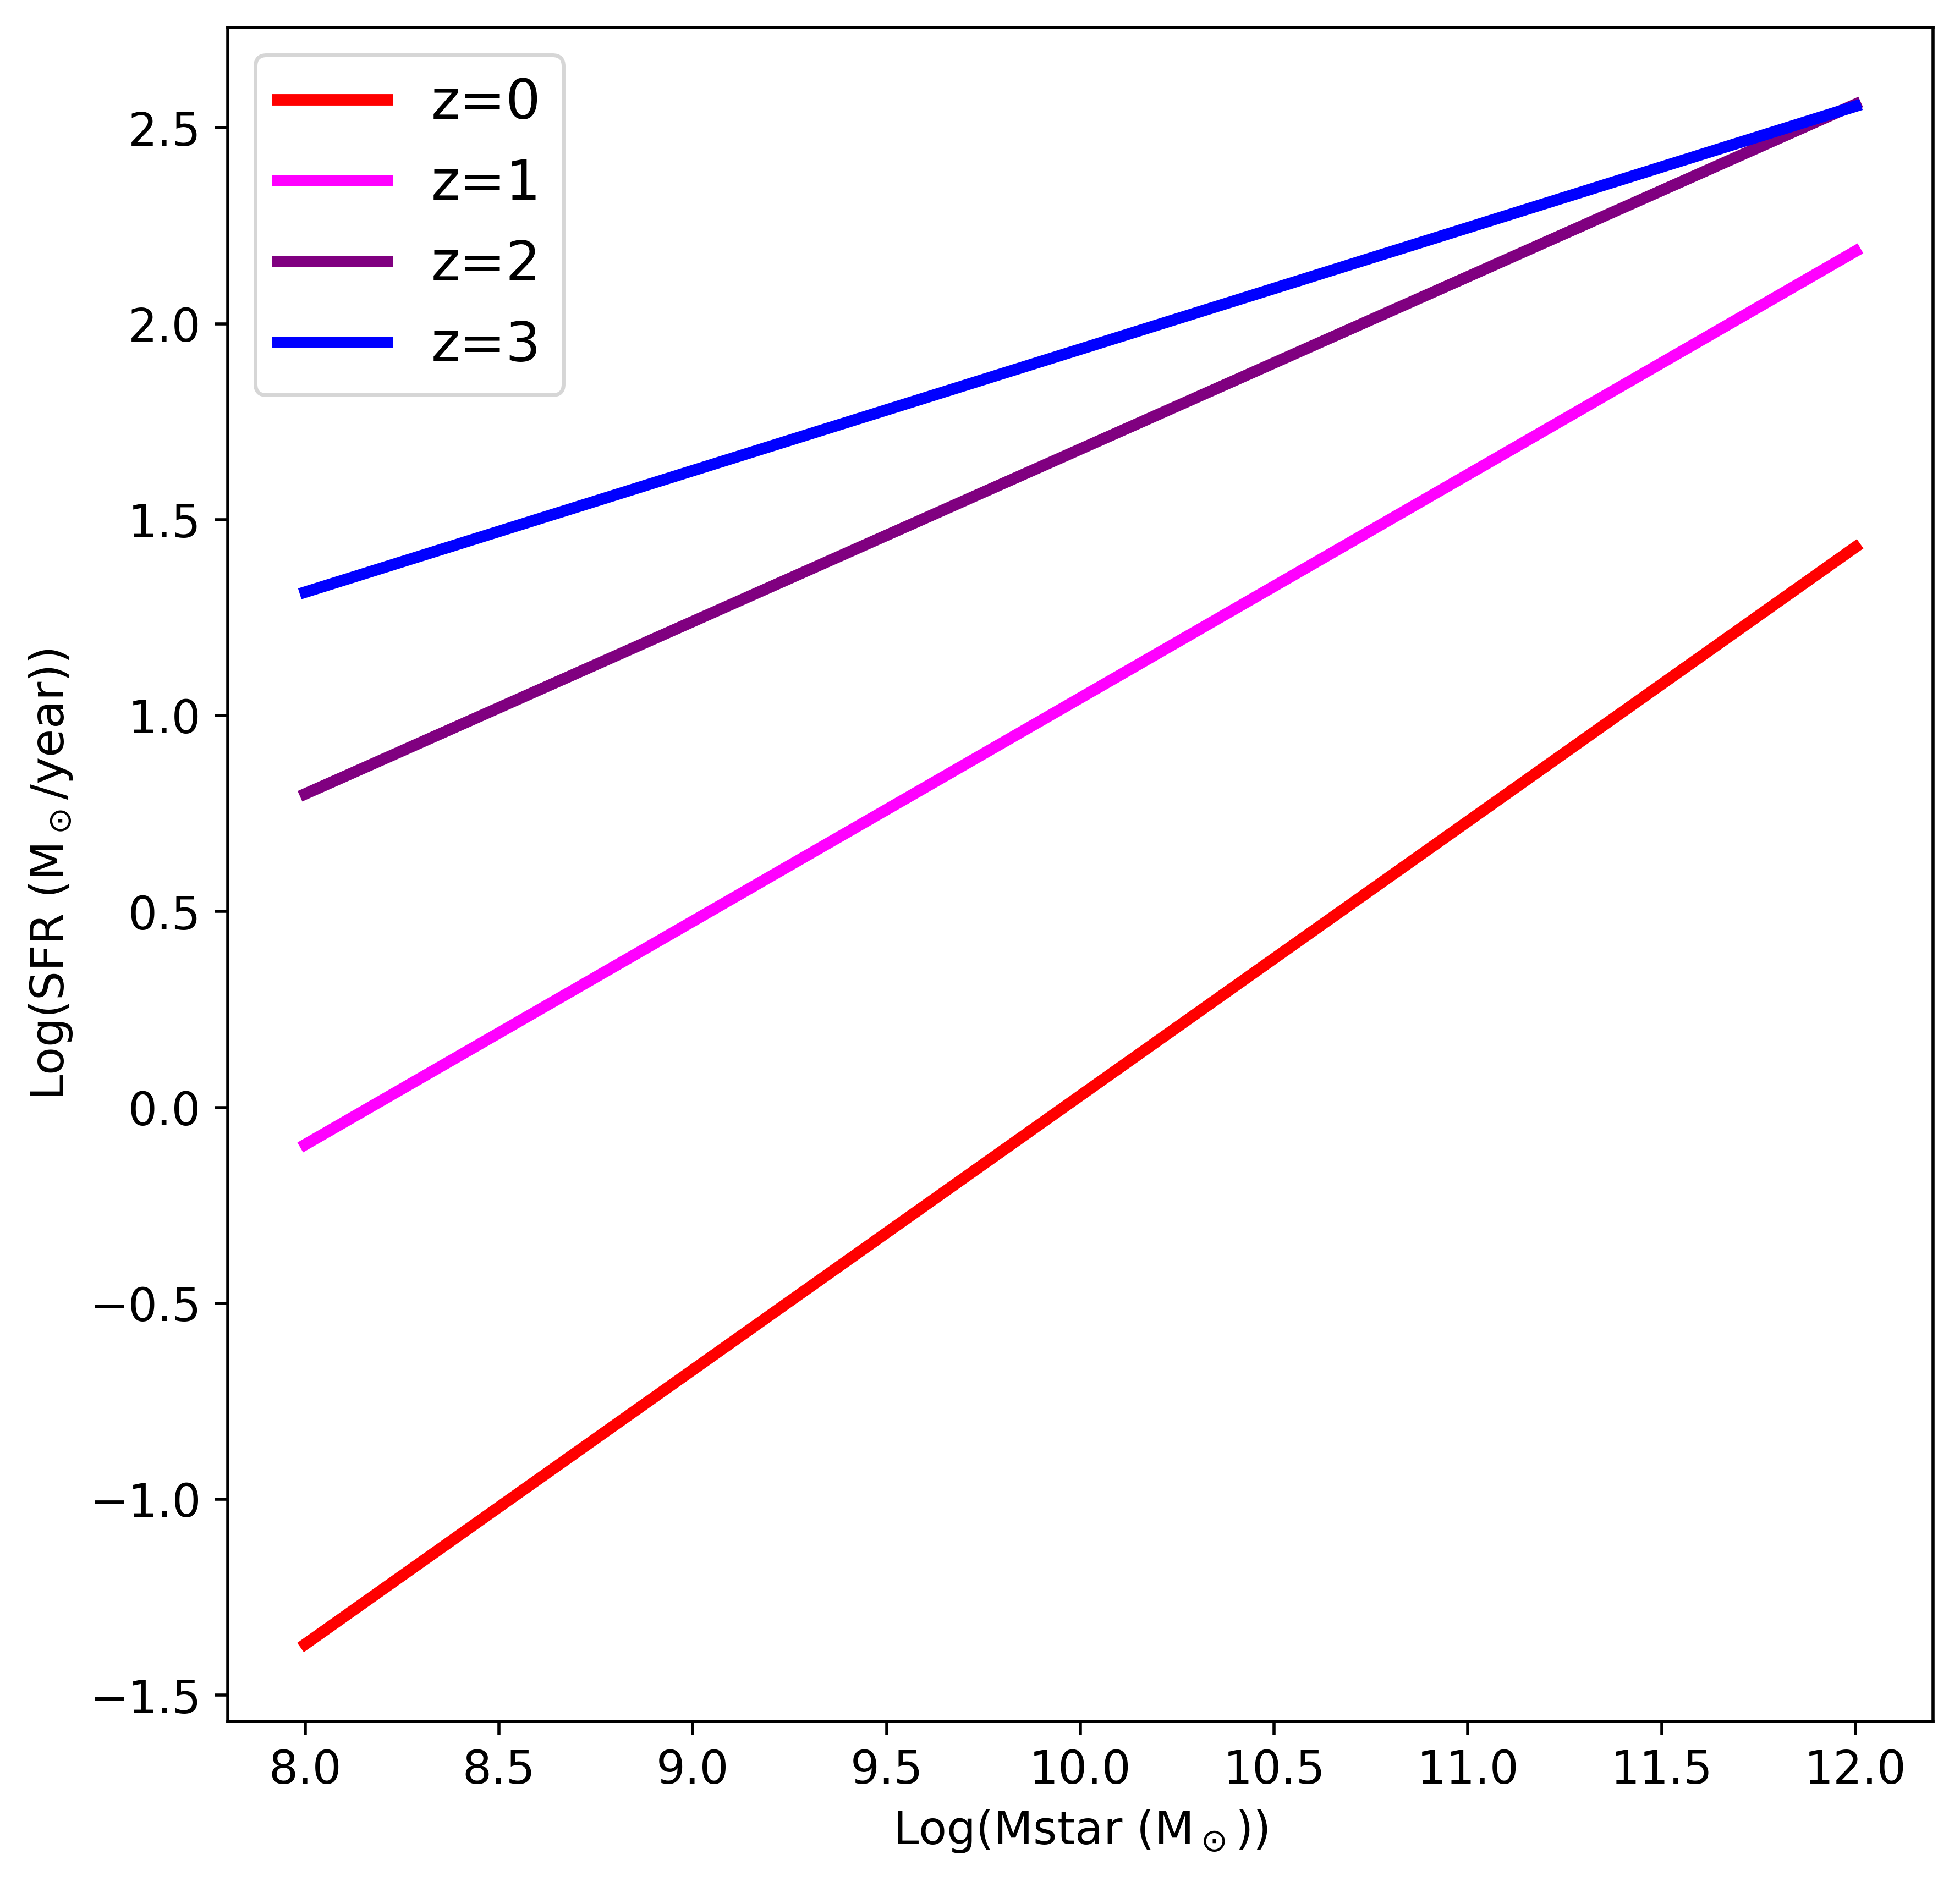

In [21]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(logmasses, SFR_MainSequence(masses, 0), color='red',
         linewidth=3, label='z=0')
plt.plot(logmasses, SFR_MainSequence(masses, 1), color='magenta',
         linewidth=3, label='z=1')
plt.plot(logmasses, SFR_MainSequence(masses, 2), color='purple',
         linewidth=3, label='z=2')
plt.plot(logmasses, SFR_MainSequence(masses, 3), color='blue',
         linewidth=3, label='z=3')


# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Save file
plt.savefig('Lab8_SFR_MainSequence.png')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [22]:
# normal galaxies 
TIR_normal = 1e10*Lsun_ergs
print(10**StarFormationRate(TIR_normal, 'TIR'))

1.4892648150381245


In [23]:
# LIRGs  
TIR_LIRG = 1e11*Lsun_ergs
print(10**StarFormationRate(TIR_LIRG, 'TIR'))

14.892648150381245


In [24]:
# ULIRGs
TIR_ULIRG = 1e12*Lsun_ergs
print(10**StarFormationRate(TIR_ULIRG, 'TIR'))

148.92648150381245


In [28]:
# HLIRGs
TIR_HLIRG = 1e13*Lsun_ergs
print(10**StarFormationRate(TIR_HLIRG, 'TIR'))

1489.2648150381244
